<h1 style = "color: yellow;text-align: center;">PROYECTO ANALISIS NÚMERICO</h1>
<h3 style = "text-align: center;">Universidad EIA 2024 - 1</h3>
    <ul style = "text-align: center;list-style-type: none;">
        <li>Juan José Londoño David</li>
        <li>Juan David Hernandez</li>
        <li>Samuel Zapata</li>
    </ul>

### Importar las librerias

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.interpolate import CubicSpline

### Cargo la imagen y pongo los puntos en la silueta de la montaña

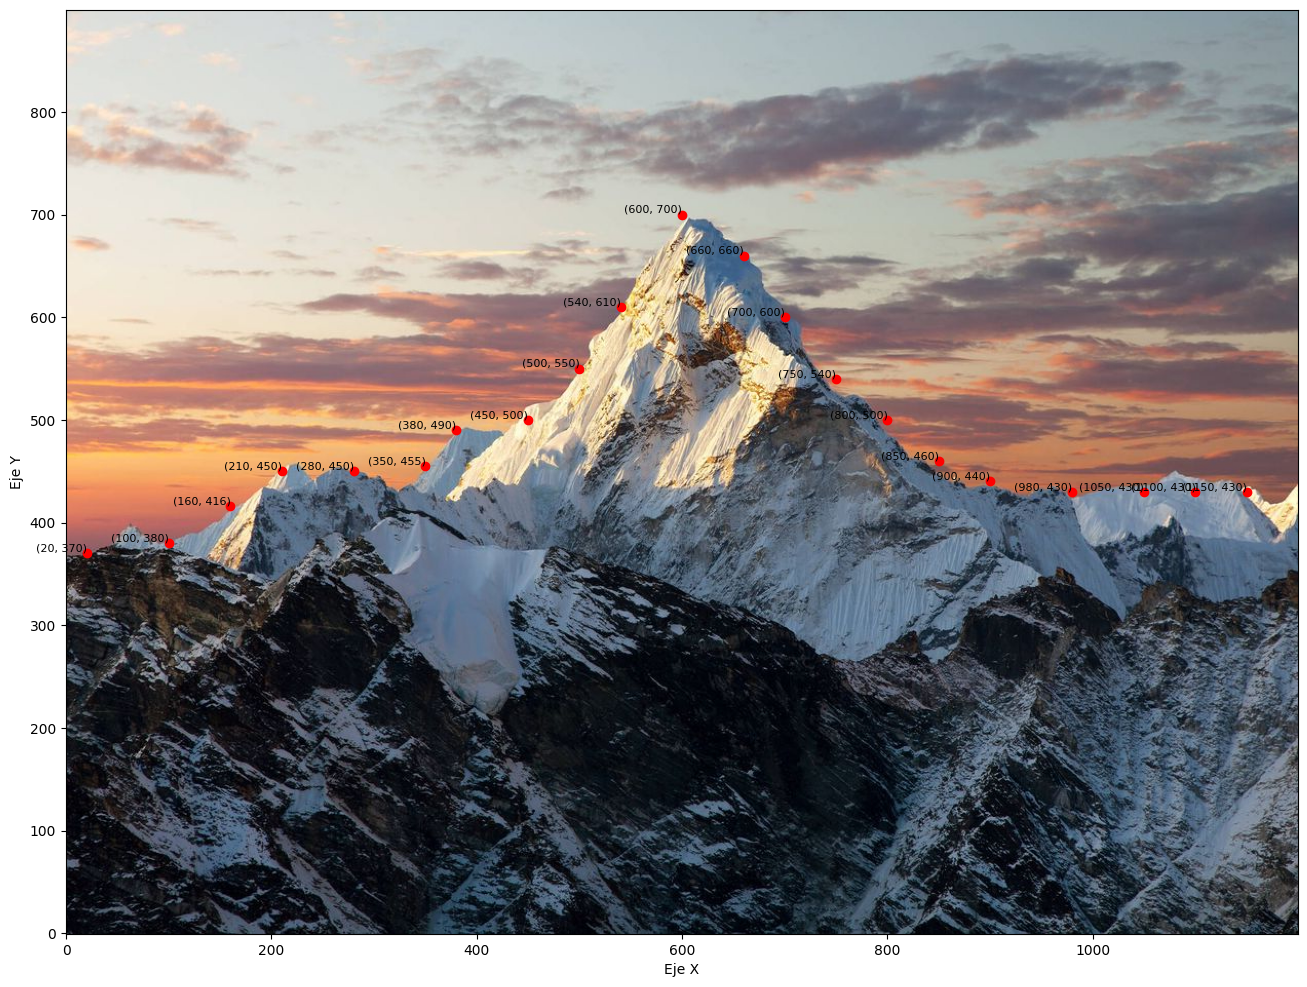

In [3]:
# Cargar la imagen
imagen = mpimg.imread('/home/juan/Documents/University/analisis/proyecto/mountain.jpg')

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(16, 12))

# Mostrar la imagen
ax.imshow(imagen)

# Configurar los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')

# Invertir los ejes
ax.invert_yaxis()
# Coordenadas de los puntos
puntos = [(600, 700),(210, 450),(160, 416),(500,550),(380, 490), (20, 370), (700, 600), (100, 380), (280, 450), (350, 455), (540,610), (450,500), (750,540), (800,500), (900, 440), (660,660), (850, 460), (980,430), (1050, 430), (1100, 430), (1150,430)]

# Marcar puntos en los ejes y agregar etiquetas
for i, (x, y) in enumerate(puntos):
    ax.plot(x, y, 'ro')  # 'ro' indica que los puntos se dibujarán como círculos rojos
    ax.text(x, y, f'({x}, {y})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Mostrar la gráfica
plt.show()


<h3 style = "color: yellow;">1. Selección De Puntos</h3>
<h3>En Geogebra, los puntos se eligen en función de la silueta, considerando la cantidad de cambios en la curva de la montaña. Estos puntos se introducen como un objeto listo y se representan gráficamente en el plano.</h3>
<h5>(600,700),(210,450),(160,416),(500,550),(380,490),(20,370),(700,600),(100,380),(280,450),(350,455),(540,610),(450,500),(750,540),(800,500),(900,440),(660,660),(850,460),(980,430),(1050,430),(1100,430),(1150,430)</h5>
<img src = "../proyecto/graficas/geogebraPuntos.png" />

### Gráfico los puntos en orden

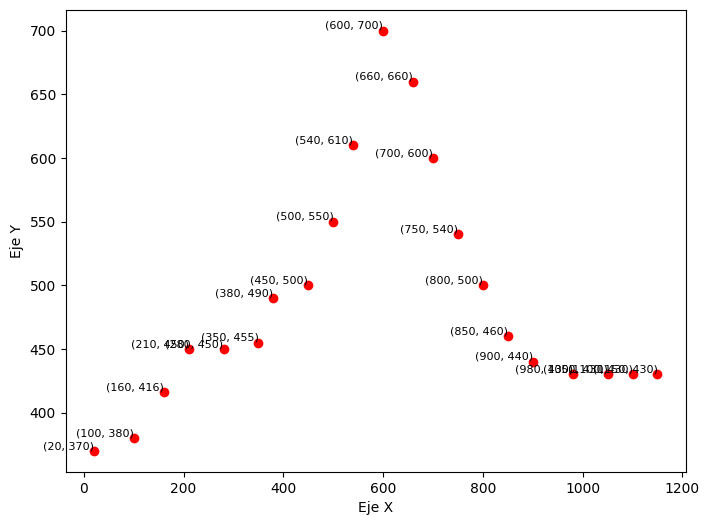

In [4]:
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
x_values, y_values = zip(*puntos)  
ax.plot(x_values, y_values, 'ro') 

for (x, y) in puntos:
    ax.text(x, y, f'({x}, {y})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.show()


### Generamos el algoritmo del spline con la libreria scipy y las condiciones de las derivadas

In [5]:
def cubic_spline_sujeto(points):
    # Ordenar los puntos por coordenada x
    points.sort(key=lambda p: p[0])
    
    # Extraer las coordenadas x e y de los puntos ordenados
    x = np.array([point[0] for point in points])
    y = np.array([point[1] for point in points])
    
    # Calcular las diferencias entre puntos en el eje x
    dx = np.diff(x)
    
    # Calcular las pendientes en los puntos extremos (aproximación)
    m0 = (y[1] - y[0]) / dx[0]  # pendiente en el primer punto
    mn = (y[-1] - y[-2]) / dx[-1]  # pendiente en el último punto
    
    # Crear un objeto de spline cúbico con condiciones de primer derivada en los extremos
    cs = CubicSpline(x, y, bc_type=((1, m0), (1, mn)))
    
    return cs

In [6]:
print(puntos)

[(600, 700), (210, 450), (160, 416), (500, 550), (380, 490), (20, 370), (700, 600), (100, 380), (280, 450), (350, 455), (540, 610), (450, 500), (750, 540), (800, 500), (900, 440), (660, 660), (850, 460), (980, 430), (1050, 430), (1100, 430), (1150, 430)]


In [7]:
   # Calcular el spline cúbico sujeto
spline = cubic_spline_sujeto(puntos)

# Mostrar algunos valores interpolados
print("Interpolación en x=1.5:", spline(1.5))
print("Interpolación en x=2.5:", spline(2.5))


Interpolación en x=1.5: 366.51033781582265
Interpolación en x=2.5: 366.76985292816147


## Graficar el spline

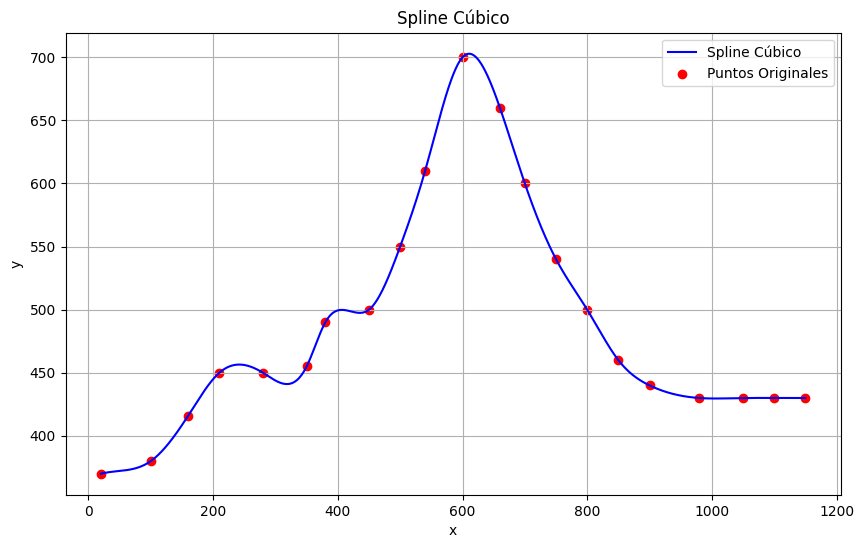

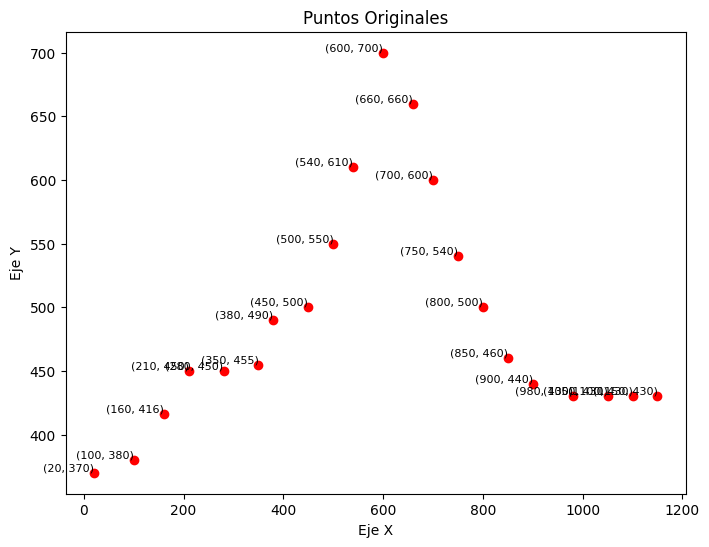

In [8]:
# Convertir las coordenadas x e y en listas separadas
x_coords = [point[0] for point in puntos]
y_coords = [point[1] for point in puntos]

# Generar valores de x en el rango que incluye los puntos originales
x_min = min(x_coords)
x_max = max(x_coords)
x_values = np.linspace(x_min, x_max, 1000)

# Evaluar el spline en los valores de x
y_values = spline(x_values)

# Graficar la curva del spline
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Spline Cúbico', color='blue')
plt.scatter(x_coords, y_coords, color='red', label='Puntos Originales')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Spline Cúbico')
plt.legend()
plt.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
x_values, y_values = zip(*puntos)  
ax.plot(x_values, y_values, 'ro') 
for (x, y) in puntos:
    ax.text(x, y, f'({x}, {y})', fontsize=8, verticalalignment='bottom', horizontalalignment='right')
plt.title('Puntos Originales')
plt.show()

